# Naive Bayes

This was just a side-path: Naive Bayes is typically used for text processing with word counts in documents. I tried it with packet counts in a network log. This didn't work well enough to put in production, but for such a simple model, I was pretty impressed with how it did! 

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_confusion_matrix

from data_read import data_read

In [2]:
%matplotlib inline
%load_ext watermark
%watermark -iv -p sklearn,mlxtend

numpy  1.15.4
pandas 0.24.0
sklearn 0.20.2
mlxtend 0.15.0.0


In [3]:
train = data_read("train", "fixed")
test = data_read("test", "fixed")

X_train = train.drop(columns=['label', 'attack_cat'])
y_train = train.label.astype(np.int)

X_test = test.drop(columns=['label', 'attack_cat'])
y_test = test.label.astype(np.int)

In [4]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [5]:
balanced_accuracy_score(y_test, y_pred, adjusted=True)

0.7073376371227169

In [6]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[796006,  91498],
       [ 24361, 104148]])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a214ab2b0>)

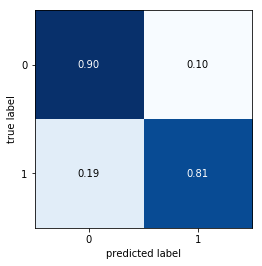

In [7]:
plot_confusion_matrix(cm, show_absolute=False, show_normed=True)

In [8]:
# and of course, what do you do with an underperforming predictor? make a whole bunch of them! 

clf = BaggingClassifier(MultinomialNB(), n_estimators=100, max_features=.50, max_samples=.50, 
                        n_jobs=-1, random_state=22)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=22, verbose=0, warm_start=False)

In [9]:
y_pred = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9118210011283683

In [10]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[773493, 114011],
       [  6155, 122354]])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a23e89438>)

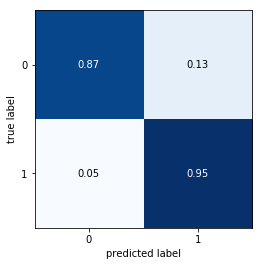

In [11]:
plot_confusion_matrix(cm, show_absolute=False, show_normed=True)

Surprising how a simple model can do so well!  Could even try to tune this further....